## Sentiment Analysis EDA - Twitter

## Import Libraries

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from nltk.tokenize import sent_tokenize
from sklearn.metrics import plot_confusion_matrix
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, Code Quality

## EDA

In [2]:
twitter_training= pd.read_csv('twitter_training.csv', sep=',', names=["Tweet ID", "Entity", "Sentiment", "Tweet Content"])

In [3]:
twitter_training.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
twitter_training.tail()

,Tweet ID,Entity,Sentiment,Tweet Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
twitter_validation=pd.read_csv('twitter_training.csv', sep=',', names=["Tweet ID", "Entity", "Sentiment", "Tweet Content"])

In [6]:
twitter_validation.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
twitter_validation.head(10)

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [8]:
twitter_validation.tail()

,Tweet ID,Entity,Sentiment,Tweet Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
len(twitter_training)

74682

In [11]:
twitter_training["Tweet ID"] = range(1, len(twitter_training) + 1)
twitter_training.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,1,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2,Borderlands,Positive,I am coming to the borders and I will kill you...
2,3,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,4,Borderlands,Positive,im coming on borderlands and i will murder you...
4,5,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
type(twitter_training)

pandas.core.frame.DataFrame

In [13]:
twitter_training["Tweet Content"]

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Tweet Content, Length: 74682, dtype: object

In [14]:
twitter_training.dropna(inplace=True)
twitter_training.drop_duplicates(inplace=True)

In [15]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   Entity         73996 non-null  object
 2   Sentiment      73996 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [16]:
len(twitter_training)

73996

In [17]:
twitter_training.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,1,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2,Borderlands,Positive,I am coming to the borders and I will kill you...
2,3,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,4,Borderlands,Positive,im coming on borderlands and i will murder you...
4,5,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Make every tweet lowercase

In [18]:
# making the data type into a string from an Object
twitter_training["Tweet Content"].astype('string')

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Tweet Content, Length: 73996, dtype: string

In [19]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   Entity         73996 non-null  object
 2   Sentiment      73996 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [20]:
Lower_tweet=twitter_training["Tweet Content"].str.lower()

In [21]:
Lower_tweet.head()

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet Content, dtype: object

In [22]:
#test if the string is now lowercase
Lower_tweet.iloc[900]

'the atleast i have borderlands to come cheer me up : ('

## Tokenize the data 

In [23]:
Token_tweet_content=Lower_tweet

In [24]:
Token_tweet_content.head()

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet Content, dtype: object

In [25]:
Token_tweet_content[1].split()

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all,']

In [26]:
token_pattern = r"(?u)\b\w\w+\b" #default token pattern from sklearn
tokenizer = RegexpTokenizer(token_pattern)

In [27]:
#Token_tweet_content2=Token_tweet_content[Token_tweet_content.columns[cols]]

In [28]:
tokenizer.tokenize(Token_tweet_content[900]) #test if the tokenizer removes emojis, bye bye 

['atleast', 'have', 'borderlands', 'to', 'cheer', 'me', 'up']

In [29]:
twitter_training["Tweet Content"]=twitter_training["Tweet Content"].str.lower()

In [30]:
twitter_training.iloc[900] #test to see if the lowercase is the case for the data set

Tweet ID                                                       905
Entity                                                 Borderlands
Sentiment                                                 Positive
Tweet Content    the atleast i have borderlands to come cheer m...
Name: 904, dtype: object

In [31]:
twitter_training.tail(7) #lowercase has been removed

,Tweet ID,Entity,Sentiment,Tweet Content
74675,74676,Nvidia,Positive,<unk> my elim be no.... nvidia highlights pict...
74676,74677,Nvidia,Positive,just realized the windows partition of my mac ...
74677,74678,Nvidia,Positive,just realized that the windows partition of my...
74678,74679,Nvidia,Positive,just realized that my mac window partition is ...
74679,74680,Nvidia,Positive,just realized the windows partition of my mac ...
74680,74681,Nvidia,Positive,just realized between the windows partition of...
74681,74682,Nvidia,Positive,just like the windows partition of my mac is l...


In [32]:
twitter_training["Tokenized Tweets"]= twitter_training["Tweet Content"].apply(tokenizer.tokenize)
twitter_training["Tokenized Tweets"].head()

0    [im, getting, on, borderlands, and, will, murd...
1    [am, coming, to, the, borders, and, will, kill...
2    [im, getting, on, borderlands, and, will, kill...
3    [im, coming, on, borderlands, and, will, murde...
4    [im, getting, on, borderlands, and, will, murd...
Name: Tokenized Tweets, dtype: object

In [33]:
twitter_training.tail(20) #here we have the new column entry

,Tweet ID,Entity,Sentiment,Tweet Content,Tokenized Tweets
74662,74663,Nvidia,Neutral,nvidia therefore doesn ’ t want to give up its...,"[nvidia, therefore, doesn, want, to, give, up,..."
74663,74664,Nvidia,Neutral,is doesn’t should i give up its password ‘cryp...,"[is, doesn, should, give, up, its, password, c..."
74664,74665,Nvidia,Negative,nvidia really delayed the 3070 2 weeks .,"[nvidia, really, delayed, the, 3070, weeks]"
74665,74666,Nvidia,Negative,nvidia really delayed the 3070 by 2 weeks.,"[nvidia, really, delayed, the, 3070, by, weeks]"
74666,74667,Nvidia,Negative,nvidia did delay by 3070 2 weeks.,"[nvidia, did, delay, by, 3070, weeks]"
74667,74668,Nvidia,Negative,nvidia really delayed the 3070 several weeks.,"[nvidia, really, delayed, the, 3070, several, ..."
74668,74669,Nvidia,Negative,nvidia really only delayed the 3070 2 flight w...,"[nvidia, really, only, delayed, the, 3070, fli..."
74669,74670,Nvidia,Negative,nvidia really delayed the next 2 weeks.,"[nvidia, really, delayed, the, next, weeks]"
74670,74671,Nvidia,Positive,let no elim go unnoticed. . . . nvidia highlig...,"[let, no, elim, go, unnoticed, nvidia, highlig..."
74671,74672,Nvidia,Positive,t let elim go unnoticed.... nvidia highlights ...,"[let, elim, go, unnoticed, nvidia, highlights,..."


From the sample above, there are words like 'the, and of'. Emojis and punctuation have been removed and it is lowercase for now. 

## Stopword Removal

Import stopwords from the library

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords') #download list of stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jabrahmbhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stopwords.words('English') #List of Stopwords library

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
stopwords_list=stopwords.words('English')

In [37]:
stopwords_list.append('com')  #this is added to the list after a freq distribution showed "com" at the top of the list
# 'com' added to the list tells us nothing, so we have decided to remove it

In [38]:
#twitter_training["No STWD"]= [word for word in twitter_training["Tokenized Tweets"] if not word in stopwords.words()]
#Create a function to remove stopwords
def remove_stopwords(word_list):

    stopwords_removed= [word for word in word_list if word not in stopwords_list]
    return stopwords_removed


In [39]:
twitter_training["No STWD"]= twitter_training["Tokenized Tweets"].apply(remove_stopwords)

In [40]:
twitter_training.tail(20)

,Tweet ID,Entity,Sentiment,Tweet Content,Tokenized Tweets,No STWD
74662,74663,Nvidia,Neutral,nvidia therefore doesn ’ t want to give up its...,"[nvidia, therefore, doesn, want, to, give, up,...","[nvidia, therefore, want, give, 2017, crypto, ..."
74663,74664,Nvidia,Neutral,is doesn’t should i give up its password ‘cryp...,"[is, doesn, should, give, up, its, password, c...","[give, password, crypto, wallet, docs, maxbit,..."
74664,74665,Nvidia,Negative,nvidia really delayed the 3070 2 weeks .,"[nvidia, really, delayed, the, 3070, weeks]","[nvidia, really, delayed, 3070, weeks]"
74665,74666,Nvidia,Negative,nvidia really delayed the 3070 by 2 weeks.,"[nvidia, really, delayed, the, 3070, by, weeks]","[nvidia, really, delayed, 3070, weeks]"
74666,74667,Nvidia,Negative,nvidia did delay by 3070 2 weeks.,"[nvidia, did, delay, by, 3070, weeks]","[nvidia, delay, 3070, weeks]"
74667,74668,Nvidia,Negative,nvidia really delayed the 3070 several weeks.,"[nvidia, really, delayed, the, 3070, several, ...","[nvidia, really, delayed, 3070, several, weeks]"
74668,74669,Nvidia,Negative,nvidia really only delayed the 3070 2 flight w...,"[nvidia, really, only, delayed, the, 3070, fli...","[nvidia, really, delayed, 3070, flight, weeks]"
74669,74670,Nvidia,Negative,nvidia really delayed the next 2 weeks.,"[nvidia, really, delayed, the, next, weeks]","[nvidia, really, delayed, next, weeks]"
74670,74671,Nvidia,Positive,let no elim go unnoticed. . . . nvidia highlig...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,..."
74671,74672,Nvidia,Positive,t let elim go unnoticed.... nvidia highlights ...,"[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnoticed, nvidia, highlights,..."


Now stopwords have been removed 

## Frequency Distributions

In [41]:
from nltk import FreqDist

In [42]:
FRQ= twitter_training["No STWD"].apply(FreqDist) #apply across column NO STWD

In [43]:
FRQ.iloc[900] #Test to see the 900th entry

FreqDist({'atleast': 1, 'borderlands': 1, 'come': 1, 'cheer': 1})

In [44]:
FRQ[912].most_common(1)

[('gearboxofficial', 1)]

In [45]:
twitter_training["No STWD"].explode()  #each element now has its own row, we can now find out which words occurs the most

0                 im
0            getting
0        borderlands
0             murder
1             coming
            ...     
74681          years
74681         behind
74681        drivers
74681           idea
74681         notice
Name: No STWD, Length: 818580, dtype: object

In [46]:
element_list=twitter_training["No STWD"].explode() 
Frq_dist=FreqDist(element_list)

In [47]:
Frq_dist #previously, there was 'com' with the highest distribution, this was added to the stopwords list and removed

FreqDist({'game': 8253, 'like': 4928, 'pic': 4253, 'twitter': 4225, 'get': 3951, 'one': 3643, 'good': 3572, 'play': 3467, 'new': 3281, 'love': 3278, ...})

In [48]:
Frq_dist.most_common(20) #here we have the most common words

[('game', 8253),
 ('like', 4928),
 ('pic', 4253),
 ('twitter', 4225),
 ('get', 3951),
 ('one', 3643),
 ('good', 3572),
 ('play', 3467),
 ('new', 3281),
 ('love', 3278),
 ('really', 3269),
 ('unk', 3108),
 ('johnson', 3044),
 ('time', 3010),
 ('people', 2931),
 ('see', 2785),
 ('shit', 2785),
 ('co', 2603),
 ('best', 2574),
 ('facebook', 2481)]

## Lemmatization

In [49]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('gaming')

'gaming'

In [50]:
def lemmatize_word(word_list):

    lemmatized_word= [lemmatizer.lemmatize(word) for word in word_list]
    return lemmatized_word

In [51]:
twitter_training["Lemma"]= twitter_training["No STWD"].apply(lemmatize_word)

In [52]:
twitter_training.tail(20)

,Tweet ID,Entity,Sentiment,Tweet Content,Tokenized Tweets,No STWD,Lemma
74662,74663,Nvidia,Neutral,nvidia therefore doesn ’ t want to give up its...,"[nvidia, therefore, doesn, want, to, give, up,...","[nvidia, therefore, want, give, 2017, crypto, ...","[nvidia, therefore, want, give, 2017, crypto, ..."
74663,74664,Nvidia,Neutral,is doesn’t should i give up its password ‘cryp...,"[is, doesn, should, give, up, its, password, c...","[give, password, crypto, wallet, docs, maxbit,...","[give, password, crypto, wallet, doc, maxbit, ..."
74664,74665,Nvidia,Negative,nvidia really delayed the 3070 2 weeks .,"[nvidia, really, delayed, the, 3070, weeks]","[nvidia, really, delayed, 3070, weeks]","[nvidia, really, delayed, 3070, week]"
74665,74666,Nvidia,Negative,nvidia really delayed the 3070 by 2 weeks.,"[nvidia, really, delayed, the, 3070, by, weeks]","[nvidia, really, delayed, 3070, weeks]","[nvidia, really, delayed, 3070, week]"
74666,74667,Nvidia,Negative,nvidia did delay by 3070 2 weeks.,"[nvidia, did, delay, by, 3070, weeks]","[nvidia, delay, 3070, weeks]","[nvidia, delay, 3070, week]"
74667,74668,Nvidia,Negative,nvidia really delayed the 3070 several weeks.,"[nvidia, really, delayed, the, 3070, several, ...","[nvidia, really, delayed, 3070, several, weeks]","[nvidia, really, delayed, 3070, several, week]"
74668,74669,Nvidia,Negative,nvidia really only delayed the 3070 2 flight w...,"[nvidia, really, only, delayed, the, 3070, fli...","[nvidia, really, delayed, 3070, flight, weeks]","[nvidia, really, delayed, 3070, flight, week]"
74669,74670,Nvidia,Negative,nvidia really delayed the next 2 weeks.,"[nvidia, really, delayed, the, next, weeks]","[nvidia, really, delayed, next, weeks]","[nvidia, really, delayed, next, week]"
74670,74671,Nvidia,Positive,let no elim go unnoticed. . . . nvidia highlig...,"[let, no, elim, go, unnoticed, nvidia, highlig...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnoticed, nvidia, highlight, ..."
74671,74672,Nvidia,Positive,t let elim go unnoticed.... nvidia highlights ...,"[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnoticed, nvidia, highlights,...","[let, elim, go, unnoticed, nvidia, highlight, ..."


## TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer(max_features=20)

In [55]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [56]:
twitter_training["Reverse"]=twitter_training["Lemma"].apply(TreebankWordDetokenizer().detokenize)

In [57]:
twitter_training_vectorized=tfidf.fit_transform(twitter_training["Reverse"])

In [58]:
pd.DataFrame.sparse.from_spmatrix(twitter_training_vectorized, columns=tfidf.get_feature_names_out())

,best,co,game,get,good,johnson,like,love,new,one,people,pic,play,player,really,see,shit,time,twitter,unk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73991,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73994,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [59]:
twitter_training['Sentiment'].iloc[49647]

'Irrelevant'

In [60]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train, y_test = train_test_split(twitter_training[['Reverse']], twitter_training[['Sentiment']], test_size=0.2, random_state=42)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()
X_train_vect= vectorizer.fit_transform(X_train['Reverse'])
X_test_vect= vectorizer.transform(X_test['Reverse'])

y_train=y_train['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2, "Irrelevant":2})
y_test=y_test['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2, "Irrelevant":2})

Clean up Validation data following same steps

In [62]:
twitter_validation.dropna(inplace=True)
twitter_validation.drop_duplicates(inplace=True)

In [63]:
twitter_validation["Tweet Content"].astype('string')

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Tweet Content, Length: 71656, dtype: string

In [64]:
twitter_validation["Tweet Content"]=twitter_validation["Tweet Content"].str.lower()

In [65]:
twitter_validation["Tokenized Tweets"]= twitter_validation["Tweet Content"].apply(tokenizer.tokenize)

In [66]:
twitter_validation["No STWD"]= twitter_validation["Tokenized Tweets"].apply(remove_stopwords)

In [67]:
twitter_validation["Lemma"]= twitter_validation["No STWD"].apply(lemmatize_word)

In [68]:
twitter_validation["Reverse"]=twitter_validation["Lemma"].apply(TreebankWordDetokenizer().detokenize)

In [69]:
validation_X = vectorizer.transform(twitter_validation['Reverse'])
validation_y = twitter_validation['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2})

In [70]:
y_train

49647    2
43676    0
55915    1
14927    0
44039    2
        ..
37541    1
6332     2
55392    1
864      0
15956    2
Name: Sentiment, Length: 59196, dtype: int64

## Logistic Regression Results

Reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 


Author: Dennis T

In [4]:
cnf3=   [[0.75, 0.07 , 0.185],
 [ 0.055, 0.79 ,0.155],
 [ 0.08, 0.079 ,0.84]]
#Overall Results accuracy is 80%

cnf5=   [[3089, 270 , 760],
 [ 243, 3459 , 678],
 [ 523, 502 , 5276]]
#Overall Results accuracy is 80%

cnf6= [[0.8, 0.064 , 0.113],
 [ 0.06, 0.82 , 0.1],
 [ 0.136, 0.119 , 0.79]]

[Text(0.5, 1.0, 'Logistic Regression Results')]

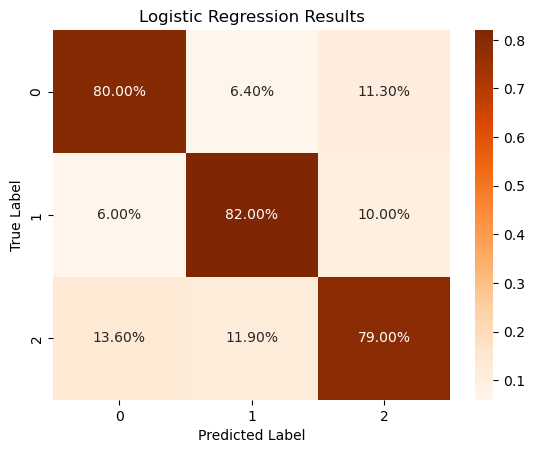

In [5]:
import seaborn as sns
import numpy as np
c= sns.heatmap(cnf6, annot=True, 
            fmt='0.2%', cmap='Oranges')
c.set_xlabel('Predicted Label', fontsize=10) 
c.set_ylabel('True Label', fontsize=10) 
c.set(title='Logistic Regression Results')

[Text(0.5, 1.0, 'Logistic Regression Results')]

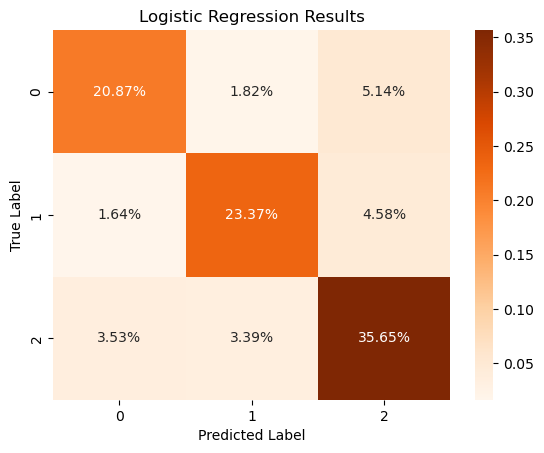

In [3]:
import seaborn as sns
import numpy as np
a= sns.heatmap(cnf5/np.sum(cnf5), annot=True, 
            fmt='0.2%', cmap='Oranges')
a.set_xlabel('Predicted Label', fontsize=10) 
a.set_ylabel('True Label', fontsize=10) 
a.set(title='Logistic Regression Results')

[Text(0.5, 1.0, 'Logistic Regression Results')]

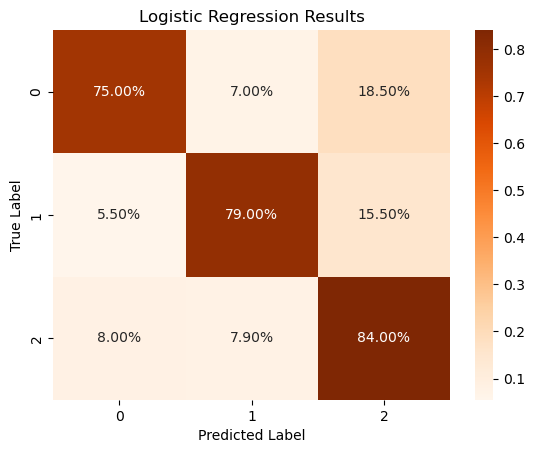

In [80]:
import seaborn as sns
import numpy as np
a= sns.heatmap(cnf3, annot=True, 
            fmt='0.2%', cmap='Oranges')
a.set_xlabel('Predicted Label', fontsize=10) 
a.set_ylabel('True Label', fontsize=10) 
a.set(title='Logistic Regression Results')


In [75]:
cnf4=   [[0.738, 0.097 , 0.165],
 [ 0.09, 0.75 ,0.155],
 [ 0.138, 0.101 ,0.76]]

[Text(0.5, 1.0, 'Decision Tree Results')]

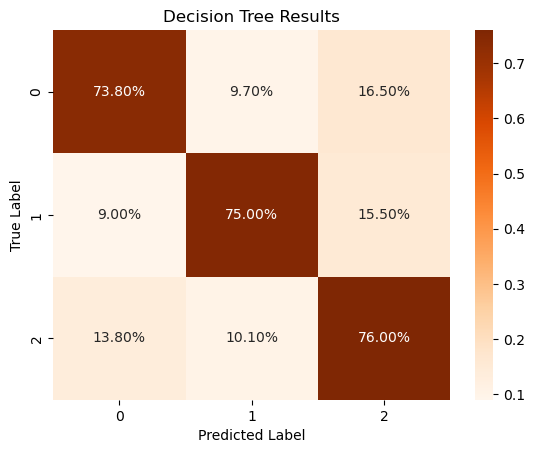

In [76]:
b= sns.heatmap(cnf4, annot=True, 
            fmt='0.2%', cmap='Oranges')
b.set_xlabel('Predicted Label', fontsize=10) 
b.set_ylabel('True Label', fontsize=10) 
b.set(title='Decision Tree Results')

In [6]:
# cnf6= [[3039, 400 , 680],
#  [ 413, 3289 , 678],
#  [ 872, 639 , 4790]]

cnf10= [[0.7, 0.092 , 0.11],
 [ 0.09, 0.76 , 0.111],
 [ 0.2, 0.148 , 0.778]]

[Text(0.5, 1.0, 'Decision Tree Results')]

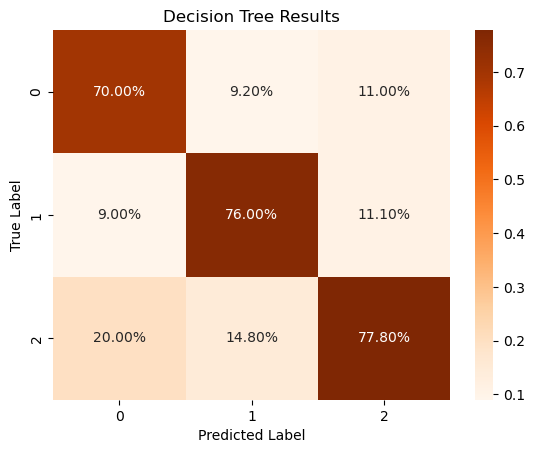

In [7]:
d= sns.heatmap(cnf10, annot=True, 
            fmt='0.2%', cmap='Oranges')
d.set_xlabel('Predicted Label', fontsize=10) 
d.set_ylabel('True Label', fontsize=10) 
d.set(title='Decision Tree Results')

In [8]:
# cnf11= [[72, 45 , 149],
#  [ 254, 100 , 103],
#  [ 102, 127 , 48]]

cnf111= [[0.168, 0.165 , 0.496],
 [ 0.59, 0.368 , 0.34],
 [ 0.24, 0.467 , 0.16]]

[Text(0.5, 1.0, 'Neural Network Results')]

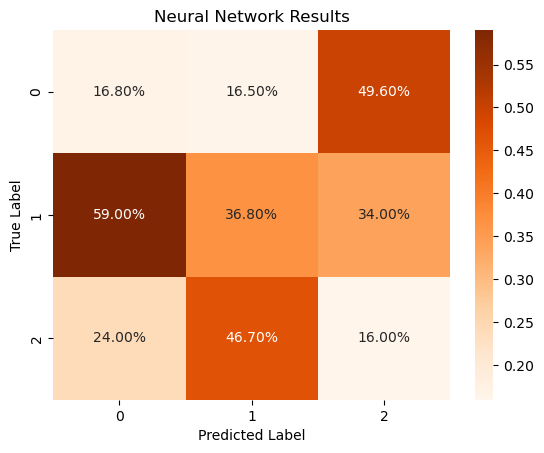

In [10]:
e= sns.heatmap(cnf111, annot=True, 
            fmt='0.2%', cmap='Oranges')
e.set_xlabel('Predicted Label', fontsize=10) 
e.set_ylabel('True Label', fontsize=10) 
e.set(title='Neural Network Results')